In [220]:
import os
import h5py
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
data_dir='ATL06/Byrd_glacier_rel001/'

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import h5py

# make sure we're dealing with the most recent version of any code we're using
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


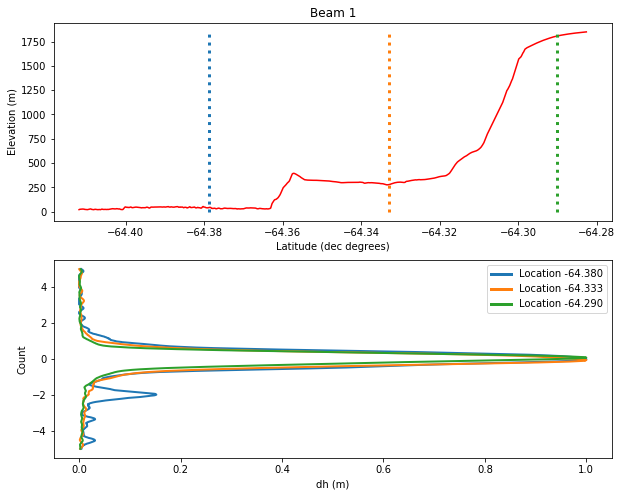

In [226]:
ATL06_file=glob('/home/jovyan/crackup/Outputs_Edgeworth/*ATL06*.h5')

f6 = h5py.File(ATL06_file[0], 'r')
beam6 = [k for k in f6.keys() if k.startswith('gt')]
beam = beam6[1];
lookfor = ['delta_time','h_li','h_li_sigma','latitude','longitude','segment_id','sigma_geo_h']

#File Structure
data6 = {}
data6[beam] = {}

#Residual Histogram
data6[beam]['residual_histogram'] = {}
for key,val in f6[beam]['residual_histogram'].items():
    data6[beam]['residual_histogram'][key] = val[:]

#Land Ice Segements
data6[beam]['land_ice_segments'] = {}
for key,val in f6[beam]['land_ice_segments'].items():
    if key in lookfor:
        data6[beam]['land_ice_segments'][key] = val[:] 
      
#identify bad values to filter-out
bv = np.nonzero(data6[beam6[1]]['land_ice_segments']['h_li'] < 5000) #replace 5000 w/ real no-data value

#  Shorten variable names
D6x = data6[beam]['land_ice_segments']['latitude'][bv]
D6y = data6[beam]['land_ice_segments']['h_li'][bv]
rh = data6[beam]['residual_histogram']

#Interpolation
tK=np.arange(-20, 20)*0.01
kernel=np.exp(-(tK**2)/2/(0.1**2))
kernel=kernel/kernel.sum()
kernel.shape=[1, kernel.size]
Ps=scipy.signal.convolve2d(rh['count'], kernel,'same')

# Plot setup
lat_slice = [-64.38,-64.333,-64.29]
yl=[0,np.max(D6y)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False,figsize=(10,8))
ax[0].plot(D6x,D6y,'r-',lw=1.5,label='ATL06 Surface')

# Loop for each sample location
for li,ls in enumerate(lat_slice):
    d = np.abs(rh['lat_mean']-lat_slice[li])
    result = np.where(d == np.min(d))
    ax[0].plot(np.zeros(2)+rh['lat_mean'][result[0]],yl,':',lw=3)
    ax[1].plot(Ps[result[0],:].T/np.max(Ps[result[0],:]), rh['dh'],'-',lw=2,label="Location %.3f" % lat_slice[li])
# Plot labels
lgd = ax[1].legend()
for line in lgd.get_lines():
    line.set_linewidth(3)
ax[0].set_xlabel('Latitude (dec degrees)')
ax[0].set_ylabel('Elevation (m)')
ax[1].set_xlabel('Relative Height (m)')
ax[1].set_ylabel('Count')
ax[0].set_title('Beam 1')
plt.show()
# f6.close()




In [224]:
print('what',f6[beam6[1]]['land_ice_segments'].keys())

what <KeysViewHDF5 ['atl06_quality_summary', 'bias_correction', 'delta_time', 'dem', 'fit_statistics', 'geophysical', 'ground_track', 'h_li', 'h_li_sigma', 'latitude', 'longitude', 'segment_id', 'sigma_geo_h']>


In [225]:
print('what',f6[beam6[1]]['residual_histogram'].keys())

what <KeysViewHDF5 ['bckgrd_per_bin', 'count', 'delta_time', 'dh', 'ds_segment_id', 'lat_mean', 'lon_mean', 'pulse_count', 'segment_id_list', 'x_atc_mean']>
